## Annual and Monthly Means of the Maximum Temperatures of all WOD Instruments

This notebook computes and saves the Maximum Temperature of each time value in a csv file. It then plots the Maximum Temperature for all the times. Annual and monthly means are also plotted.   

In [1]:
# import libraries
from datetime import datetime, timedelta
import numpy as np
import xarray
import matplotlib.pyplot as plt
%matplotlib inline 
import pandas as pd
from pandas import Series, DataFrame
import gsw
import cmocean
import sys
import glob
import errno
import os
import os.path
import netCDF4 as nc
import geopandas as gpd
import string
import time
import csv

C:\Users\maria\AppData\Local\Continuum\anaconda3\lib\site-packages\cmocean\tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
datadir = '/path/datafolder/' # Insert folder path
for filename in os.listdir(datadir):
    
    #savedir = '/path/savefolder/' 
    # Insert directory you'd like to save in
        
    #def filecount(dir_name):
    #   """This function counts number of files in directory provided"""
    #   return len([f for f in os.listdir(dir_name) if os.path.isfile(f)])
    
    fname = filename
        
    ncdata = xarray.open_dataset(datadir + fname)
    juld = pd.to_datetime(ncdata.time.values) # convert time values to datetime
    lats = np.array(ncdata.lat.values) # latitude
    lons = np.array(ncdata.lon.values) # longitude
    temp = ncdata.Temperature.values # in situ temperature
        
    maxtemp = temp.max() # Computes maximum temperature
        
    if maxtemp > 3: # Skips maximum temperatures above 3 (considered anomalous)
        continue
       
    maxT = ([maxtemp])
    
    data = {'MaxTemp': maxT}
    df = DataFrame(data, index=[juld])
        
    with open("path\csvfile", "a")  as f: 
        # Insert path for the file you'll save the dataframe in
        table1 = df.to_csv(f, sep=',', header=False)
            

In [12]:
ncdata.Temperature_origflag

<xarray.DataArray 'Temperature_origflag' (z: 498)>
array([1, 1, 1, ..., 1, 1, 1], dtype=int16)
Coordinates:
    lat      float32 -69.271
    lon      float32 -23.584
    time     datetime64[ns] 2017-04-12T00:30:57.239896064
  * z        (z) float32 2.8212461 4.405086 6.384869 8.364633 10.344377 ...
Attributes:
    flag_definitions:  Oflag

In [3]:
def try_parsing_date(text):
    """ This function takes in date written as a string 
    in two different formats and returns it as datetime"""
    for fmt in ('%Y-%m-%d', '%Y-%m-%d %H:%M:%S'):
        try:
            return datetime.strptime(text, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found')

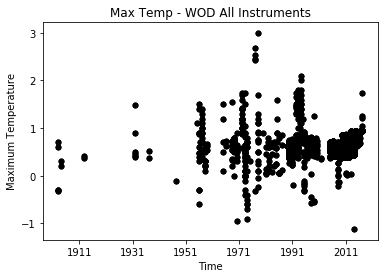

In [4]:
# Plot all Maximum Temperatures in a time series
x=[]
y=[]

with open('path\csvfile','r') as csvfile: 
    plots = csv.reader(csvfile, delimiter=',')
    for column in plots:
        yeartime = column[0].split(".")[0] # Ignores fraction seconds
        x.append(try_parsing_date(yeartime))
        y.append(float(column[1])) # MaxTemp column

plt.scatter(x,y, label='Loaded from file!', color='k', s=25, marker="o")
plt.xlabel('Time')
plt.ylabel('Maximum Temperature')
#plt.yscale('symlog', linthreshx=0.1)
plt.title('Max Temp - WOD All Instruments')
plt.show()

In [5]:
df1 = pd.read_csv('path\csvfile', header=None, error_bad_lines=False, delimiter=',')
# Insert file path you stored MaxTemp in
df1.columns = ['YearTime', 'MaxTemp'] # Setup the column headers
df1

,YearTime,MaxTemp
0,1912-10-14 16:00:00.001716736,0.370
1,1912-11-05 11:00:00.000858112,0.410
2,1932-01-16 09:59:59.999141888,0.460
3,1932-01-16 21:00:00,1.480
4,1932-01-17 09:59:59.999141888,0.500
5,1932-01-19 06:00:00,0.890
6,1932-01-21 22:00:00.001716224,0.410
7,1932-01-22 22:00:00.001716224,0.400
8,1937-03-14 22:00:00.001716224,0.380
9,1937-03-15 21:00:00,0.520


In [6]:
df2 = df1.set_index("YearTime", drop = False) # Set time as index of the dataframe
df2

,YearTime,MaxTemp
YearTime,,
1912-10-14 16:00:00.001716736,1912-10-14 16:00:00.001716736,0.370
1912-11-05 11:00:00.000858112,1912-11-05 11:00:00.000858112,0.410
1932-01-16 09:59:59.999141888,1932-01-16 09:59:59.999141888,0.460
1932-01-16 21:00:00,1932-01-16 21:00:00,1.480
1932-01-17 09:59:59.999141888,1932-01-17 09:59:59.999141888,0.500
1932-01-19 06:00:00,1932-01-19 06:00:00,0.890
1932-01-21 22:00:00.001716224,1932-01-21 22:00:00.001716224,0.410
1932-01-22 22:00:00.001716224,1932-01-22 22:00:00.001716224,0.400
1937-03-14 22:00:00.001716224,1937-03-14 22:00:00.001716224,0.380


   YearTime      MEAN
0      1903  0.084000
1      1904  0.250000
2      1912  0.390000
3      1932  0.690000
4      1937  0.450000
5      1947 -0.100000
6      1955  1.074000
7      1956  0.404545
8      1957  0.900000
9      1958  0.350185
10     1959  0.616667
11     1965  0.771667
12     1966  0.740000
13     1968  0.627692
14     1969  0.624706
15     1970  0.409000
16     1972  1.212857
17     1973  0.396489
18     1974  0.106667
19     1975  0.314000
20     1977  1.958600
21     1978  0.786263
22     1979  0.900000
23     1981  0.226667
24     1982  0.500000
25     1983  0.396667
26     1984  0.500000
27     1985  0.735818
28     1986  0.127000
29     1987  0.536667
30     1989  0.532983
31     1990  0.490328
32     1991  0.113850
33     1992  0.780834
34     1993  0.764325
35     1994  1.366667
36     1995  0.431090
37     1996  0.652293
38     1997  0.474000
39     1998  0.551520
40     1999  0.408510
41     2000  0.570000
42     2001  0.372100
43     2005  0.583862
44     200

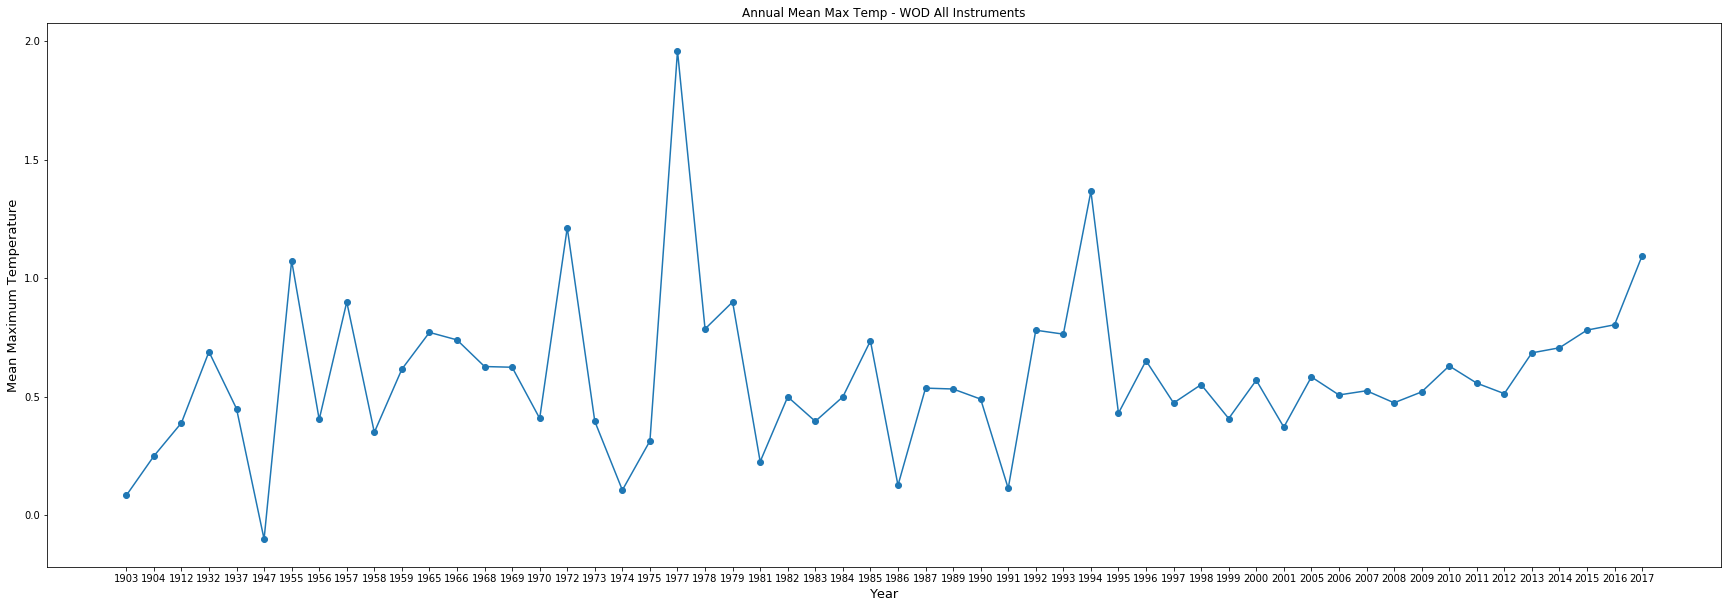

In [7]:
# Plot Annual Mean Maximum Temperature
df3 = df2['MaxTemp'].groupby(df2['YearTime'].str[:4]).mean().rename('MEAN').reset_index()
print (df3)

fig=plt.figure(figsize=(30,10))
plt.plot(df3['YearTime'], df3['MEAN'])
plt.scatter(df3['YearTime'], df3['MEAN'])
plt.xlabel('Year', fontsize = 13)
plt.ylabel('Mean Maximum Temperature', fontsize = 13)
#plt.yscale('symlog', linthreshx=0.1)
plt.title('Annual Mean Max Temp - WOD All Instruments')
plt.show()

C:\Users\maria\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


    YearTime      mean  count
0    1903-03  0.084000     10
1    1904-02  0.250000      4
2    1912-10  0.370000      2
3    1912-11  0.410000      2
4    1932-01  0.690000     12
5    1937-03  0.450000      4
6    1947-02 -0.100000      2
7    1955-01  1.100000      2
8    1955-12  1.067500      8
9    1956-02  0.261111     18
10   1956-03  1.050000      4
11   1957-02  0.900000     28
12   1958-01  0.560000      6
13   1958-02  0.320371     12
14   1958-03  0.200000      6
15   1959-01  0.616667      6
16   1965-01  0.802000     10
17   1965-12  0.620000      2
18   1966-01  0.740000      2
19   1968-03  0.627692     26
20   1969-02  0.617500     32
21   1969-03  0.740000      2
22   1970-02  0.236000     10
23   1970-03  0.582000     10
24   1972-02  1.212857     42
25   1973-01  0.337605     76
26   1973-02  0.716143     14
27   1974-01  0.106667     30
28   1975-02  0.314000      2
29   1977-02  1.958600     10
..       ...       ...    ...
159  2014-07  0.846667     18
160  2014-

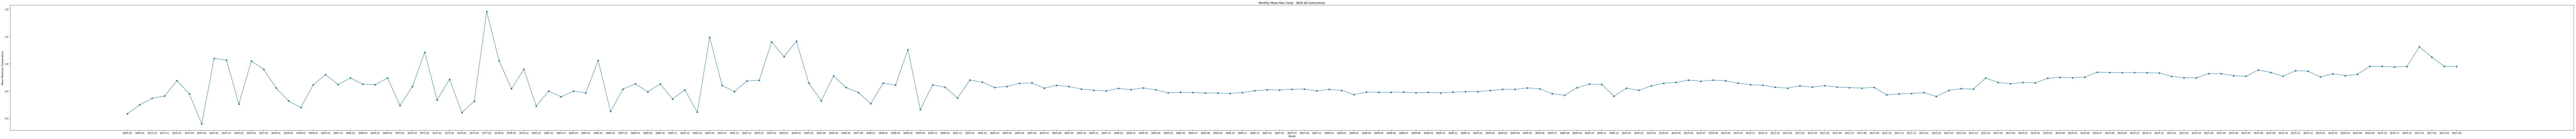

In [8]:
# Plot Monthly Mean Maximum Temperatures and the monthly datapoints count
df3m = df2['MaxTemp'].groupby(df2['YearTime'].str[:7]).agg(['mean', 'count']).reset_index()
print (df3m)

x = df3m['YearTime']
y = df3m['mean'] # Mean dataframe

plt.figure(figsize=(200,10))
plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel('Month')
plt.ylabel('Mean Maximum Temperature')
#plt.yscale('symlog', linthreshx=0.1)
plt.title('Monthly Mean Max Temp - WOD All Instruments')
plt.show()

   YearTime      mean       std  count
0      1903  0.084000  0.496906     10
1      1904  0.250000  0.057735      4
2      1912  0.390000  0.023094      4
3      1932  0.690000  0.408011     12
4      1937  0.450000  0.080829      4
5      1947 -0.100000  0.000000      2
6      1955  1.074000  0.389735     10
7      1956  0.404545  0.585269     22
8      1957  0.900000  0.285450     28
9      1958  0.350185  0.170428     24
10     1959  0.616667  0.054650      6
11     1965  0.771667  0.479713     12
12     1966  0.740000  0.000000      2
13     1968  0.627692  0.310359     26
14     1969  0.624706  0.206475     34
15     1970  0.409000  0.486025     20
16     1972  1.212857  0.278220     42
17     1973  0.396489  0.421848     90
18     1974  0.106667  0.629687     30
19     1975  0.314000  0.000000      2
20     1977  1.958600  1.200924     10
21     1978  0.786263  0.725980     38
22     1979  0.900000  0.000000      2
23     1981  0.226667  0.234611     12
24     1982  0.500000  0.

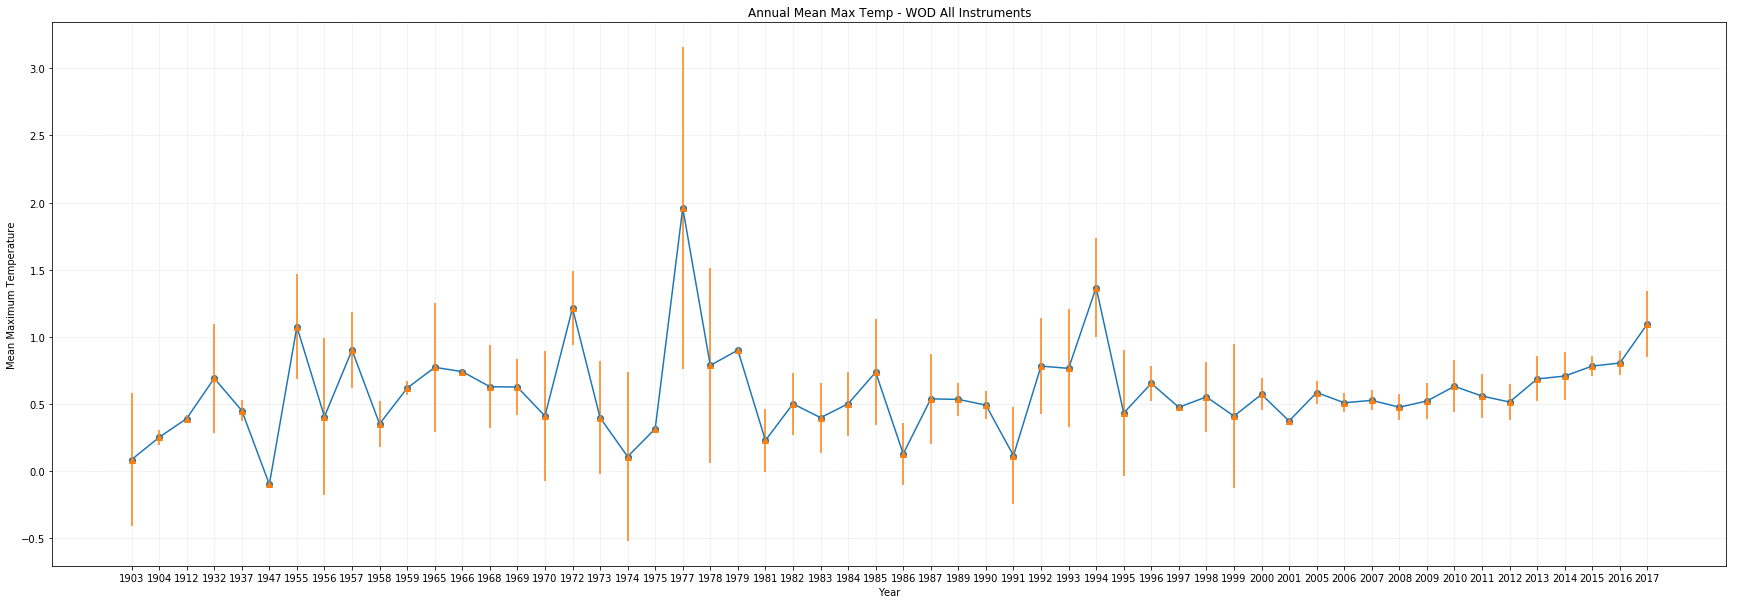

In [9]:
# Plot Annual Mean Max Temp with Std. Dev. and the annual datapoints count
df4 = df2['MaxTemp'].groupby(df2['YearTime'].str[:4]).agg(['mean', 'std', 'count']).reset_index()
print (df4)

x = df4['YearTime']
y = df4['mean'] # Mean dataframe
e = df4['std'] # Standard deviation dataframe

plt.figure(figsize=(30,10))
plt.plot(x, y)
plt.scatter(x, y)
plt.grid(alpha=0.8, linestyle=':', linewidth=.5)
plt.xlabel('Year')
plt.ylabel('Mean Maximum Temperature')
plt.errorbar(x, y, e, linestyle='None', marker='^')
plt.title('Annual Mean Max Temp - WOD All Instruments')
plt.show()